In [ ]:
# 여기에 답안코드를 작성하세요.
import pandas as pd
import numpy as np

train_2 = pd.read_csv('train_2.csv')
valid_2 = pd.read_csv('test_2.csv')

In [ ]:
valid_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49997 entries, 0 to 49996
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  49997 non-null  int64 
 1   id          49997 non-null  int64 
 2   document    49997 non-null  object
 3   label       49997 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.5+ MB


In [ ]:
train_2['document'] = train_2['document'].str.replace('[^가-힣 ]','', regex=True)
train_2['document'] = train_2['document'].str.strip()

valid_2['document'] = valid_2['document'].str.replace('[^가-힣 ]','', regex=True)
valid_2['document'] = valid_2['document'].str.strip()

In [ ]:
train_2.dropna(how='any', inplace=True)

In [ ]:
train_2['document'].duplicated().sum()

np.int64(7351)

In [ ]:
train_2.drop_duplicates(subset=['document'], inplace = True)

In [ ]:
train_2['document'].duplicated().sum()

np.int64(0)

In [ ]:
# import
from sklearn.preprocessing import LabelEncoder

# 객체 생성
le = LabelEncoder()

# 인코딩 적용
train_2['label'] = le.fit_transform(train_2['label'])

In [ ]:
train_2.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,1
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,0
2,10265843,너무재밓었다그래서보는것을추천한다,1
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,1
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,0


In [ ]:
valid_2.head()

,Unnamed: 0,id,document,label
0,0,6270596,굳,긍정
1,1,9274899,,부정
2,2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,부정
3,3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,부정
4,4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,부정


In [ ]:
!pip install konlpy tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 113.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 111.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 112.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.1 MB/s eta 0:00:00


In [ ]:
############ 이 부분은 하면 정확도가 올라감, 안해도 시험에 합격할 수 있는 수준으로 나옴

from konlpy.tag import Okt
okt = Okt()

# 형태소 단위 토큰화 함수
def okt_tokenizer(text):
    tokens = okt.morphs(text, stem=True)  # 어간 추출(stemming)
    return tokens
    # try:
    #   tokens = okt.morphs(text, stem=True)  # 어간 추출(stemming)
    # except:
    #   tokens = text
    #   print(text)
    #   exit()

    return tokens

# 전체 데이터에 적용
train_2['document'] = train_2['document'].apply(okt_tokenizer)
valid_2['document'] = valid_2['document'].apply(okt_tokenizer)
print(train_2['document'])

0                                    [아, 더빙, 진짜, 짜증나다, 목소리]
1              [흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 조차, 가볍다, 않다]
2                         [너, 무재, 밓었, 다그, 래서, 보다, 추천, 한, 다]
3                   [교도소, 이야기, 구먼, 솔직하다, 재미, 는, 없다, 평점, 조정]
4         [사이, 몬페, 그, 의, 익살스럽다, 연기, 가, 돋보이다, 영화, 스파이더맨, ...
                                ...                        
149994    [디케이드, 다음, 에, 더블, 다음, 에, 오즈, 인데, 더블, 은, 조금, 밖에...
149995                       [인간, 이, 문제, 지, 소, 는, 뭔, 죄인, 가]
149997    [이, 게, 뭐, 요, 한국인, 은, 거들다, 먹거리, 고, 필리핀, 혼혈, 은, ...
149998          [청춘, 영화, 의, 최고봉, 방황, 과, 우울하다, 날, 들, 의, 자화상]
149999              [한국, 영화, 최초, 로, 수간, 하다, 내용, 이, 담기다, 영화]
Name: document, Length: 142644, dtype: object


In [ ]:
x_train_2 = train_2['document'].values
y_train_2 = train_2['label'].values
x_valid_2 = valid_2['document']

In [ ]:
from sklearn.model_selection import train_test_split
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_train_2, y_train_2 ,
                                                            test_size=0.2,
                                                            stratify=y_train_2,
                                                            random_state=41)
print(x_train_2.shape, x_test_2.shape, y_train_2.shape, y_test_2.shape)

(114115,) (28529,) (114115,) (28529,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizer 구현 : 단어 사전 만들기(fit_on_texts)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train_2)

In [ ]:
max_words = len(tokenizer.index_word)

In [ ]:
max_words

39085

In [ ]:
x_train_seq = tokenizer.texts_to_sequences(x_train_2)
x_test_seq = tokenizer.texts_to_sequences(x_test_2)
x_valid_seq = tokenizer.texts_to_sequences(x_valid_2)

In [ ]:
print(x_train_2[1:3])
print(x_train_seq[1:3])

[list(['공감', '한다는', '사람', '있다', '점', '주다', '나다', '나름', '연애', '길다', '해봤다', '졸라', '어디서', '로맨스', '라는', '건지다', '어디서', '슬프다', '야하다', '건지다', '내', '가', '원하다', '내용', '이', '아니다', '별로', '네', '영화', '에', '등장', '하다', '여자', '들', '이', '입술', '을', '너무', '쉬다', '주네'])
 list(['국산', '페이크', '다큐', '가', '갈다', '길다', '아직', '한참', '멀다', '것', '같다'])]
[[269, 919, 52, 16, 32, 74, 111, 339, 1122, 933, 2681, 968, 789, 622, 209, 280, 789, 217, 233, 280, 40, 7, 1097, 73, 1, 31, 136, 80, 2, 6, 996, 4, 152, 10, 1, 6381, 8, 18, 605, 3441], [2521, 2596, 521, 7, 862, 933, 564, 1525, 462, 38, 26]]


In [ ]:
maxlen = max(len(line) for line in x_train_seq)

In [ ]:
maxlen

77

In [ ]:
x_train_pad = pad_sequences(x_train_seq, maxlen=maxlen)
x_test_pad = pad_sequences(x_test_seq, maxlen=maxlen)
x_valid_pad = pad_sequences(x_valid_seq, maxlen=maxlen)

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPool2D
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, SimpleRNN, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()

model.add(Embedding(max_words+1, 32, input_length=maxlen)) # 단어를 의미있는 32 차원으로 Vector 변경(Embedding)

# LSTM 모델
model.add(LSTM(16, return_sequences=True))
model.add(LSTM(16, return_sequences=True))
model.add(Flatten())
model.add(Dense(128, activation='swish'))
model.add(Dense(32, activation='swish'))
model.add(Dense(1, activation='sigmoid')) # 최종 6가지로 분류

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
checkpoint_path = 'tmp_checkpoint.keras'
cp = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
history = model.fit(x_train_pad, y_train_2, epochs=50, batch_size=512,
                      validation_split=0.2, verbose =1, callbacks=[es, cp])

Epoch 1/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.6607 - loss: 0.5831
Epoch 1: val_loss improved from inf to 0.38511, saving model to tmp_checkpoint.keras
179/179 ━━━━━━━━━━━━━━━━━━━━ 33s 161ms/step - accuracy: 0.6612 - loss: 0.5826 - val_accuracy: 0.8286 - val_loss: 0.3851
Epoch 2/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.8587 - loss: 0.3318
Epoch 2: val_loss improved from 0.38511 to 0.37191, saving model to tmp_checkpoint.keras
179/179 ━━━━━━━━━━━━━━━━━━━━ 27s 151ms/step - accuracy: 0.8587 - loss: 0.3318 - val_accuracy: 0.8368 - val_loss: 0.3719
Epoch 3/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.8861 - loss: 0.2810
Epoch 3: val_loss did not improve from 0.37191
179/179 ━━━━━━━━━━━━━━━━━━━━ 27s 151ms/step - accuracy: 0.8861 - loss: 0.2811 - val_accuracy: 0.8336 - val_loss: 0.3904
Epoch 4/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9015 - loss: 0.2486
Epoch 4: val_loss did not improve from 0.37191
179/179 ━━━━━━━━━━━━

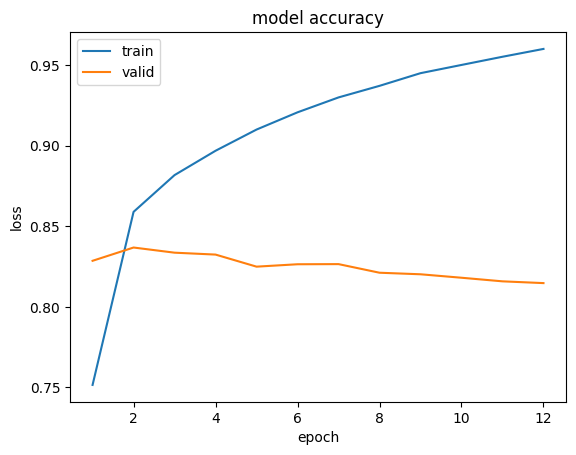

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], )

In [ ]:
model.evaluate(x_test_pad, y_test_2)

892/892 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8250 - loss: 0.8184


[0.8424694538116455, 0.8192716240882874]

In [ ]:
predict = model.predict(x_valid_pad)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step


In [ ]:
rs = (predict > 0.5).astype(int)

In [ ]:
print(rs)

[[0]
 [1]
 [0]
 ...
 [0]
 [1]
 [0]]


In [ ]:
valid_2['감정'] = rs

In [ ]:
valid_2.head()

,Unnamed: 0,id,document,label,감정
0,0,6270596,[굳다],긍정,0
1,1,9274899,[],부정,1
2,2,8544678,"[뭐, 야, 이, 평점, 들, 은, 나쁘다, 않다, 점, 짜다, 리, 는, 더, 더...",부정,0
3,3,6825595,"[지루하다, 않다, 완전, 막장, 임, 돈, 주다, 보기, 에는]",부정,1
4,4,6723715,"[만, 아니다, 별, 다섯, 개, 주다, 왜, 로, 나오다, 제, 심기, 를, 불편...",부정,1


In [ ]:
valid_2['감정'] = le.inverse_transform(valid_2['감정'])

In [ ]:
valid_2.head()

,id,document,감정
0,6270596,[굳다],긍정
1,8544678,"[뭐, 야, 이, 평점, 들, 은, 나쁘다, 않다, 점, 짜다, 리, 는, 더, 더...",부정
2,6825595,"[지루하다, 않다, 완전, 막장, 임, 돈, 주다, 보기, 에는]",부정
3,6723715,"[만, 아니다, 별, 다섯, 개, 주다, 왜, 로, 나오다, 제, 심기, 를, 불편...",부정
4,7898805,"[음악, 이, 주가, 되다, 최고, 의, 음악, 영화]",긍정


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(valid_2['label'], valid_2['감정'])
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8128


In [ ]:
valid_2.to_csv('result.csv')

In [ ]:
model.save('text_model.h5')